In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

train = pd.read_csv('./Dacon/train.csv')
test = pd.read_csv('./Dacon/test.csv')

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('bmh')
%matplotlib inline

In [166]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [167]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


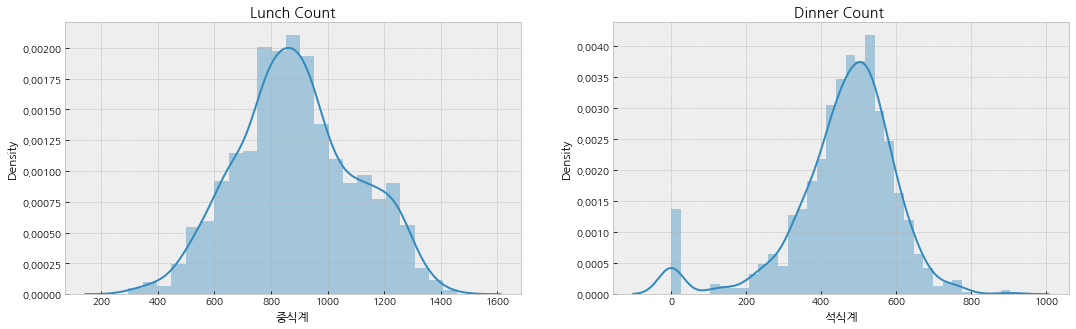

In [168]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

sns.distplot(train["중식계"],ax=ax[0])
ax[0].set_title("Lunch Count")

sns.distplot(train["석식계"],ax=ax[1])
ax[1].set_title("Dinner Count ")

plt.rcParams['font.family'] = 'NanumGothic'
plt.savefig('1.png')
plt.show()

석식을 안먹은 사람들이 꽤 있는 것을 제외하고는 어느정도 분포가 고른 편

In [169]:
print("석식계가 0인 경우")
print(train[train['석식계']==0].shape[0],"개")

석식계가 0인 경우
43 개


# EDA

## 날짜 데이터 변환 및 추출

In [170]:
from sklearn.preprocessing import LabelEncoder
def choose_datetime(df):
    df["일자"] = pd.to_datetime(df["일자"])
    df["year"] = df["일자"].dt.year
    df["month"] = df["일자"].dt.month
    df["day"] = df["일자"].dt.day
    
    day_encoder = LabelEncoder()
    df['요일'] = day_encoder.fit_transform(df['요일'])
    
date = ['일자','요일','year','month','day']
choose_datetime(train)
train[date].head()

,일자,요일,year,month,day
0,2016-02-01,3,2016,2,1
1,2016-02-02,4,2016,2,2
2,2016-02-03,2,2016,2,3
3,2016-02-04,1,2016,2,4
4,2016-02-05,0,2016,2,5


In [171]:
choose_datetime(test)
test[date].head()

,일자,요일,year,month,day
0,2021-01-27,2,2021,1,27
1,2021-01-28,1,2021,1,28
2,2021-01-29,0,2021,1,29
3,2021-02-01,3,2021,2,1
4,2021-02-02,4,2021,2,2


In [172]:
def to_week_str(df):
    weeklist = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    for i in range(7):
        df.loc[df["요일"] == i, "week(str)"] = weeklist[i]

w_eek = ["일자","요일","week(str)"]

In [173]:
to_week_str(train)
to_week_str(test)

In [174]:
train[w_eek].head()

,일자,요일,week(str)
0,2016-02-01,3,Thu
1,2016-02-02,4,Fri
2,2016-02-03,2,Wed
3,2016-02-04,1,Tue
4,2016-02-05,0,Mon


In [175]:
test[w_eek].head()

,일자,요일,week(str)
0,2021-01-27,2,Wed
1,2021-01-28,1,Tue
2,2021-01-29,0,Mon
3,2021-02-01,3,Thu
4,2021-02-02,4,Fri


In [176]:
train['week(str)'].unique()

array(['Thu', 'Fri', 'Wed', 'Tue', 'Mon'], dtype=object)

## YEAR + MONTH

In [177]:
train["year+month"] = train["year"].astype('str')+"-"+train["month"].astype('str')
train[["일자","year+month"]]

,일자,year+month
0,2016-02-01,2016-2
1,2016-02-02,2016-2
2,2016-02-03,2016-2
3,2016-02-04,2016-2
4,2016-02-05,2016-2
...,...,...
1200,2021-01-20,2021-1
1201,2021-01-21,2021-1
1202,2021-01-22,2021-1
1203,2021-01-25,2021-1


2016년도부터 2021년 1월까지의 식당이용자수를 파악해보자

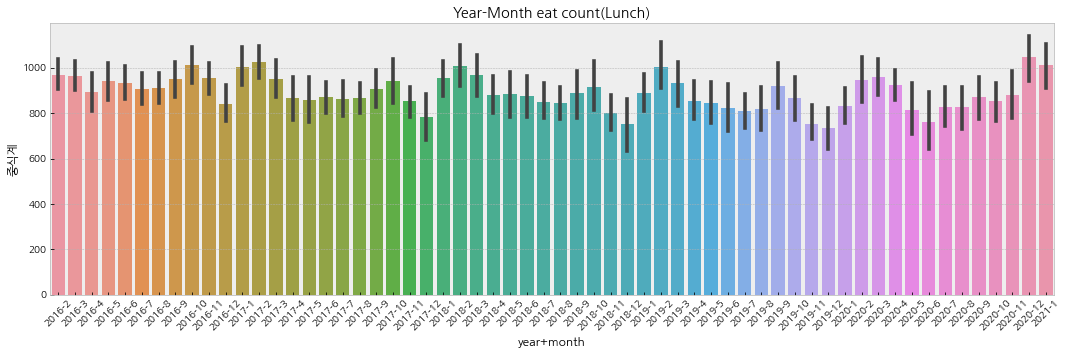

In [178]:
plt.figure(figsize=(18,5))
sns.barplot(data=train, x="year+month",y="중식계").set_title("Year-Month eat count(Lunch)")
plt.xticks(rotation=45)
plt.savefig('5_1.png')
plt.show()

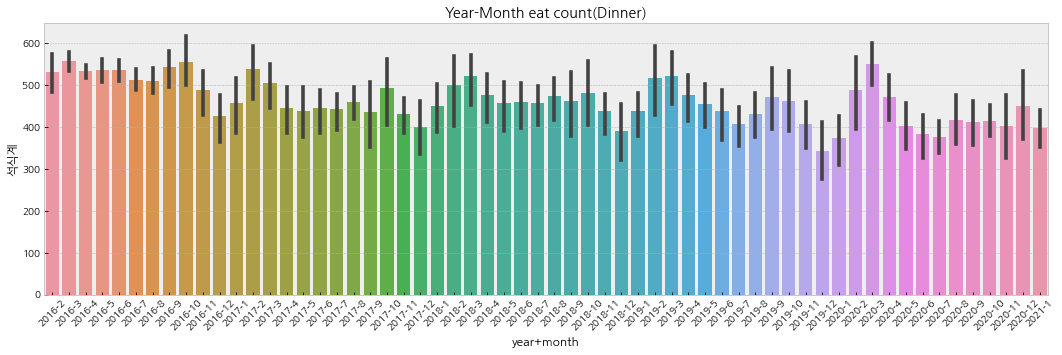

In [179]:
plt.figure(figsize=(18,5))
sns.barplot(data=train, x="year+month",y="석식계").set_title("Year-Month eat count(Dinner)")
plt.xticks(rotation=45)
plt.savefig('5_2.png')
plt.show()

석식 이용자는 줄어드는 것으로 보임  
중식은 코로나 타격(2019.3 ~ 2020)으로 변동이 약간 있었음

## 본사 내 인원과 본사 외 인원

In [180]:
train["본사출근자수"] = train["본사정원수"] -(train["본사휴가자수"] + train["본사출장자수"] + train["현본사소속재택근무자수"] )

In [181]:
train.describe()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,year,month,day,본사출근자수
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1.995851,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,2018.052282,6.512033,15.947718,2365.253112
std,1.414501,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,1.433958,3.453906,8.650452,176.563062
min,0.000000,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,2016.000000,1.000000,1.000000,1372.000000
25%,1.000000,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,2017.000000,4.000000,9.000000,2281.000000
50%,2.000000,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,2018.000000,7.000000,16.000000,2357.000000
75%,3.000000,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,2019.000000,9.000000,23.000000,2461.000000
max,4.000000,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2021.000000,12.000000,31.000000,2921.000000


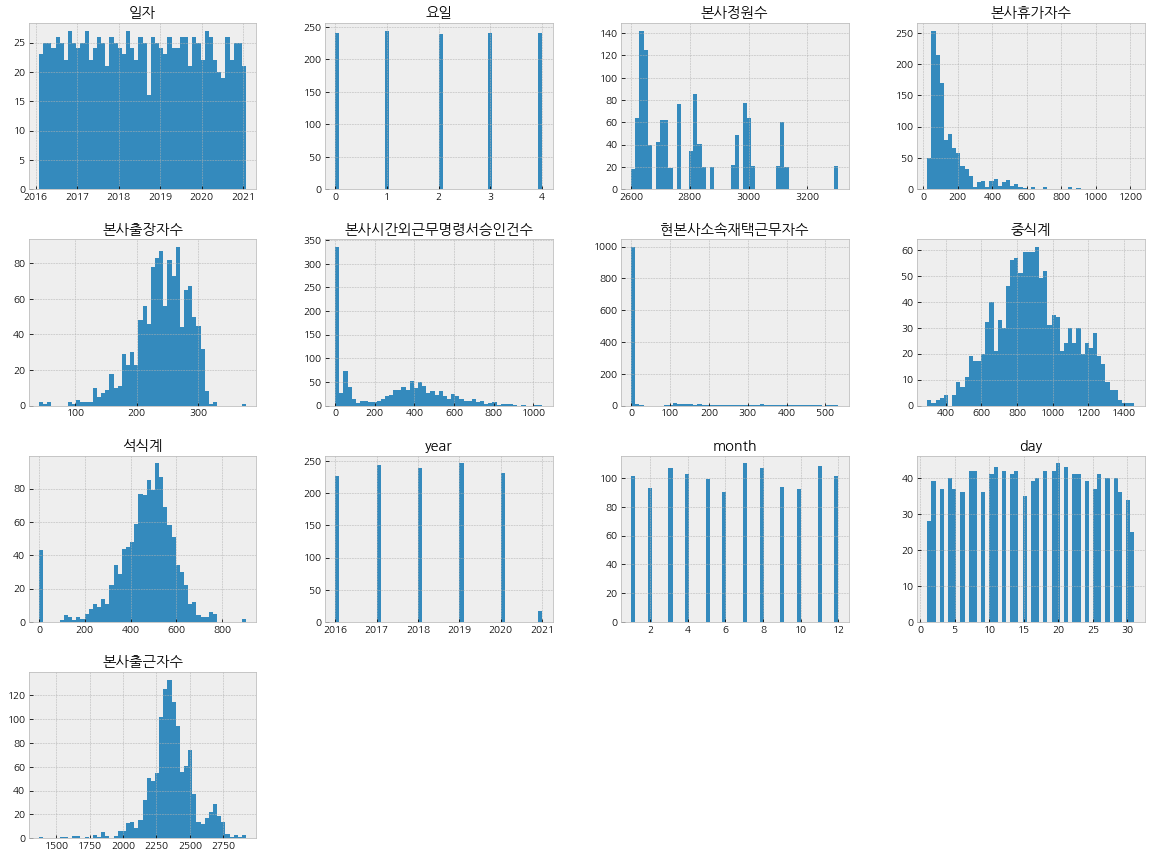

In [182]:
train.hist(bins = 50 , figsize = (20,15))
plt.show()

분포가 한쪽으로 편중되어있는 칼럼 -> 본사휴가자수  
분포가 일정하지 않은 칼럼 -> 본사정원수, 본사시간외근무명령서블라블라

array([[<AxesSubplot:xlabel='본사휴가자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사출근자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='중식계', ylabel='본사휴가자수'>],
       [<AxesSubplot:xlabel='본사휴가자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사출근자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='중식계', ylabel='본사출장자수'>],
       [<AxesSubplot:xlabel='본사휴가자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사출근자수',

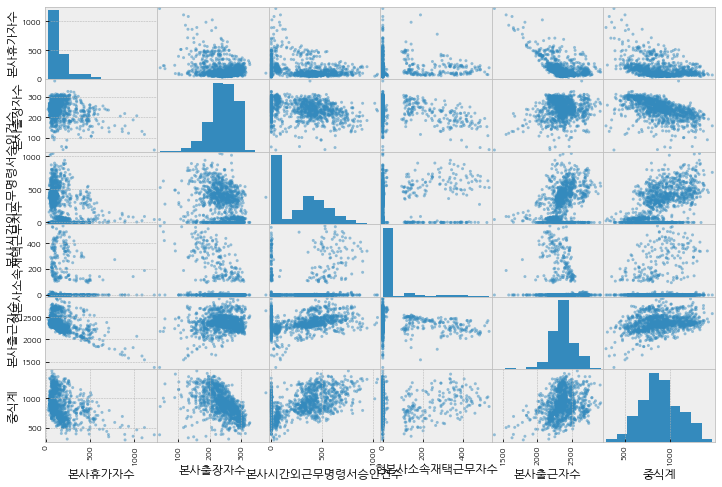

In [183]:
from pandas.plotting import scatter_matrix
attributes = ["본사휴가자수","본사출장자수","본사시간외근무명령서승인건수","현본사소속재택근무자수","본사출근자수","중식계"] 
# 특성이 많아서 11^2 = 121개 그래프를 담을 수 없기 때문에 몇개만 표시 
plt.rcParams['font.family'] = 'NanumGothic'
scatter_matrix(train[attributes],figsize=(12,8))


array([[<AxesSubplot:xlabel='본사휴가자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='본사출근자수', ylabel='본사휴가자수'>,
        <AxesSubplot:xlabel='석식계', ylabel='본사휴가자수'>],
       [<AxesSubplot:xlabel='본사휴가자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='본사출근자수', ylabel='본사출장자수'>,
        <AxesSubplot:xlabel='석식계', ylabel='본사출장자수'>],
       [<AxesSubplot:xlabel='본사휴가자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사출장자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='현본사소속재택근무자수', ylabel='본사시간외근무명령서승인건수'>,
        <AxesSubplot:xlabel='본사출근자수',

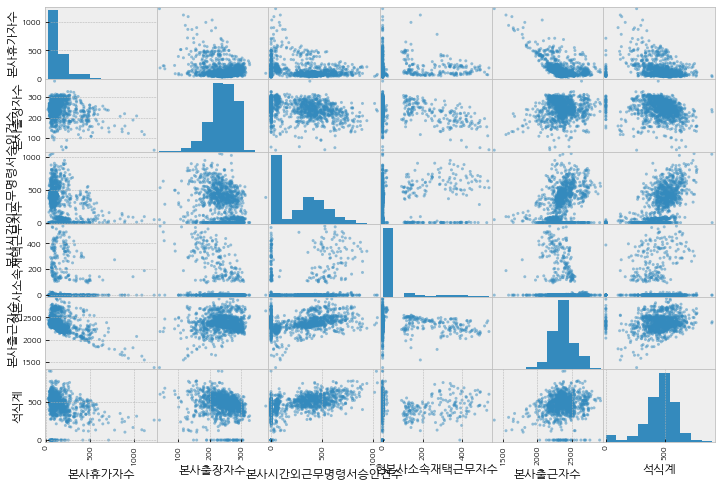

In [184]:
from pandas.plotting import scatter_matrix
attributes = ["본사휴가자수","본사출장자수","본사시간외근무명령서승인건수","현본사소속재택근무자수","본사출근자수","석식계"] 
# 특성이 많아서 11^2 = 121개 그래프를 담을 수 없기 때문에 몇개만 표시 
plt.rcParams['font.family'] = 'NanumGothic'
scatter_matrix(train[attributes],figsize=(12,8))

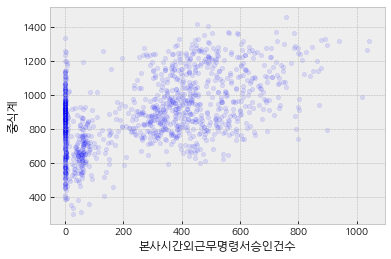

In [185]:
train.plot(kind="scatter",x="본사시간외근무명령서승인건수",y="중식계",alpha=0.1)
plt.savefig('Lunch.png')

알 수 있는 사실

- 위쪽으로 향하는 경향과 포인트들이 퍼져 있지 않다.
- 본사 시간외 근무 명령서 값이 0일 때 중식계에서 수평선이 진하게 잘보인다.
- 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 처리를 해주어야 한다.

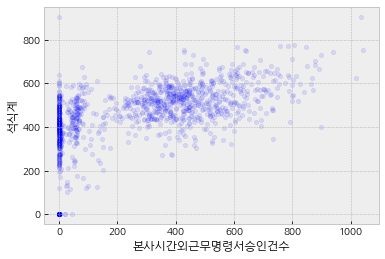

In [186]:
train.plot(kind="scatter",x="본사시간외근무명령서승인건수",y="석식계",alpha=0.1)
plt.savefig('Dinner.png')

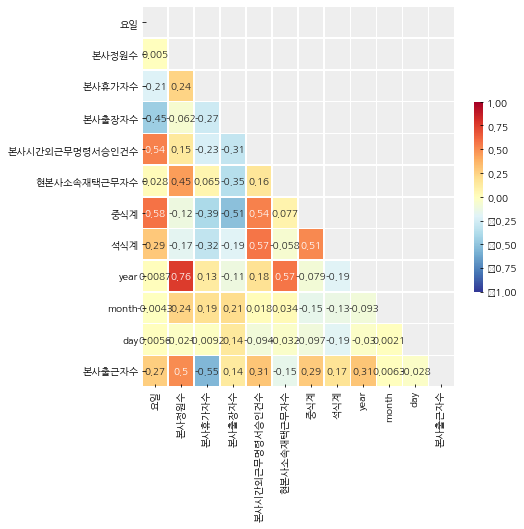

In [187]:
# 그림 사이즈 지정
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = train.corr()

fig, ax = plt.subplots( figsize=(7,7) )
plt.rcParams['font.family'] = 'NanumGothic'
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.rcParams['font.family'] = 'NanumGothic'
# 히트맵을 그린다
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

In [188]:
df_corr["중식계"].sort_values(ascending=False)

중식계               1.000000
요일                0.584193
본사시간외근무명령서승인건수    0.535611
석식계               0.508287
본사출근자수            0.286810
현본사소속재택근무자수       0.076509
year             -0.078804
day              -0.097392
본사정원수            -0.115529
month            -0.154664
본사휴가자수           -0.391975
본사출장자수           -0.512680
Name: 중식계, dtype: float64

In [189]:
df_corr["석식계"].sort_values(ascending=False)

석식계               1.000000
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
요일                0.292941
본사출근자수            0.172373
현본사소속재택근무자수      -0.057534
month            -0.127142
본사정원수            -0.173852
day              -0.185565
본사출장자수           -0.188164
year             -0.194792
본사휴가자수           -0.316894
Name: 석식계, dtype: float64

요일과 중,석식계 간 상관성이 어느정도 있어보임

## DayOfWeek

In [190]:
train["본사외인원"] = (train["본사휴가자수"] + train["본사출장자수"] + train["현본사소속재택근무자수"] )

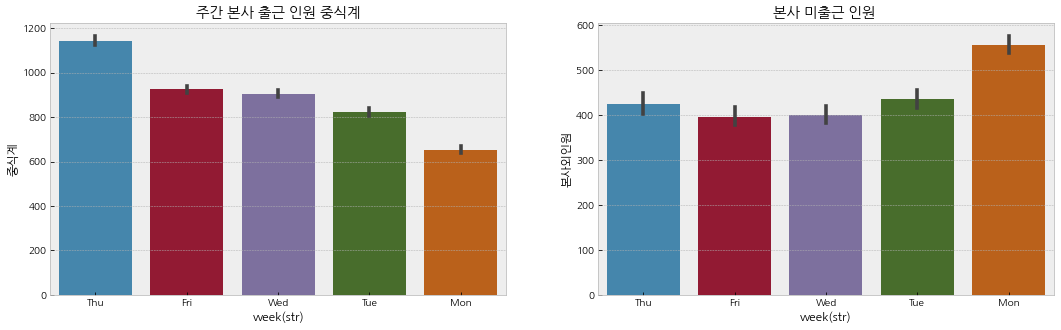

In [195]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
plt.subplots_adjust(hspace=0.3)

sns.barplot(data = train,x="week(str)",y="중식계",ax=ax[0])
ax[0].set_title("주간 본사 출근 인원 중식계")

sns.barplot(data = train,x="week(str)",y="본사외인원",ax=ax[1])
ax[1].set_title("본사 미출근 인원 ")

plt.show()

출장,휴가,재택근무 등의 이유로 본사 출근을 하지 않은 인원에 의한 영향으로 보임  
금요일,목요일의 경우는 아직 모르겠음

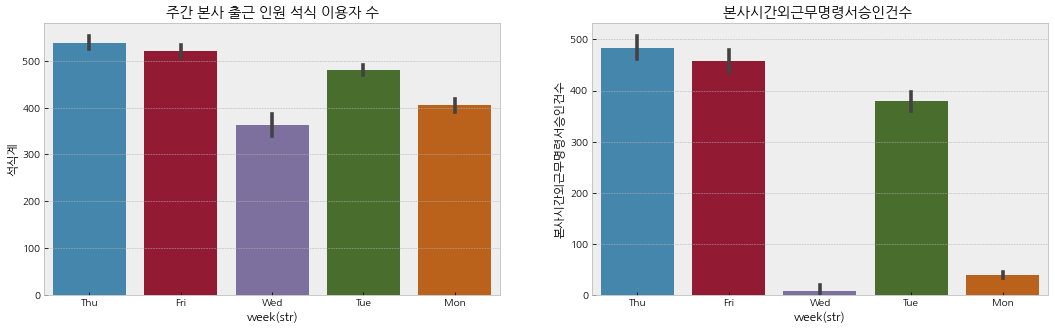

In [192]:
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,5))
plt.subplots_adjust(hspace=0.3)

sns.barplot(data = train,x="week(str)",y="석식계",ax=ax[0])
ax[0].set_title("주간 본사 출근 인원 석식 이용자 수")

sns.barplot(data = train,x="week(str)",y="본사시간외근무명령서승인건수",ax=ax[1])
ax[1].set_title("본사시간외근무명령서승인건수 ")

plt.show()

In [194]:
df = train.groupby(['week(str)'])
df = df['본사시간외근무명령서승인건수'].sum()
df

week(str)
Fri    109754
Mon      9398
Thu    116588
Tue     92609
Wed      1962
Name: 본사시간외근무명령서승인건수, dtype: int64

In [198]:
df_d = train.groupby(['week(str)'])
df_d = df_d['석식계'].sum()
df_d

week(str)
Fri    124831.0
Mon     97600.0
Thu    129883.0
Tue    117218.0
Wed     86904.0
Name: 석식계, dtype: float64

수요일과 월요일의 경우 초과근무 인원이 눈에 띄게 적다